In [20]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [21]:
data = pd.read_csv('dataset/Churn_Modelling.csv')

In [22]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [24]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

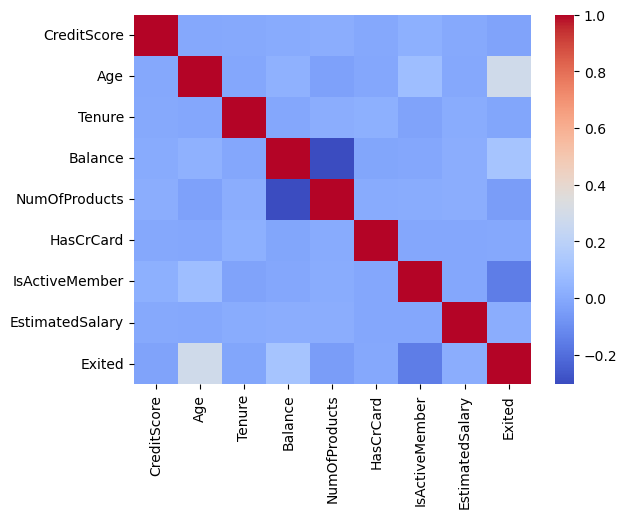

In [25]:
corr = data.select_dtypes(exclude='object').corr()
sns.heatmap(corr,cmap='coolwarm')

In [41]:
data['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

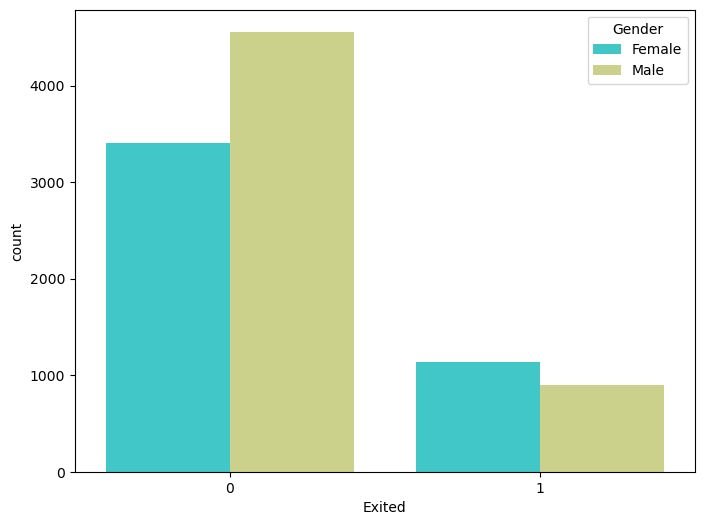

In [95]:
sns.countplot(x = data['Exited'], hue=data['Gender'], palette='rainbow')

c:\Users\shrey\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


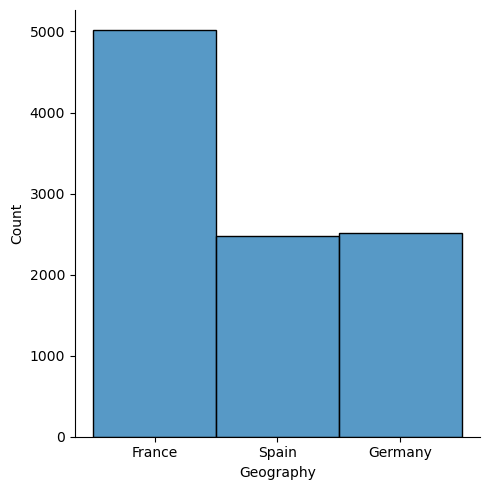

In [123]:
sns.displot(data['Geography'])

<Axes: xlabel='Age', ylabel='Count'>

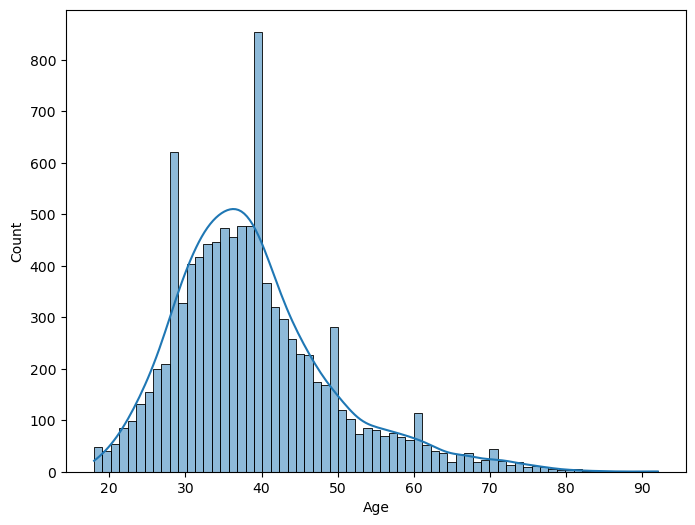

In [84]:
sns.histplot(data['Age'], kde=True)

<Axes: xlabel='CreditScore', ylabel='Count'>

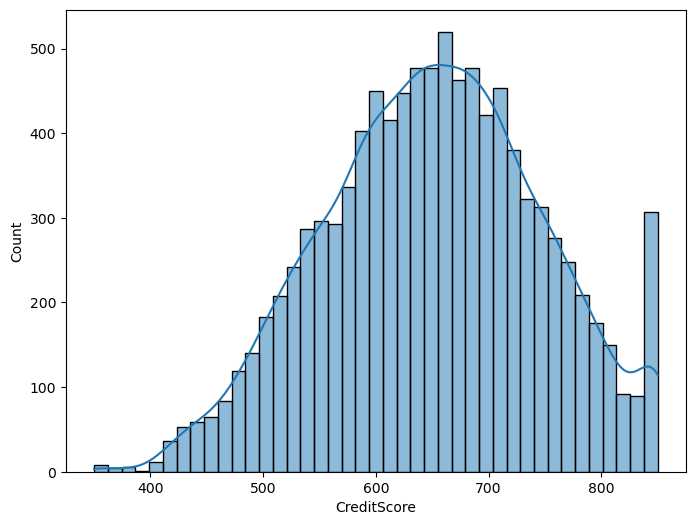

In [86]:
 sns.histplot(data['CreditScore'], kde=True)

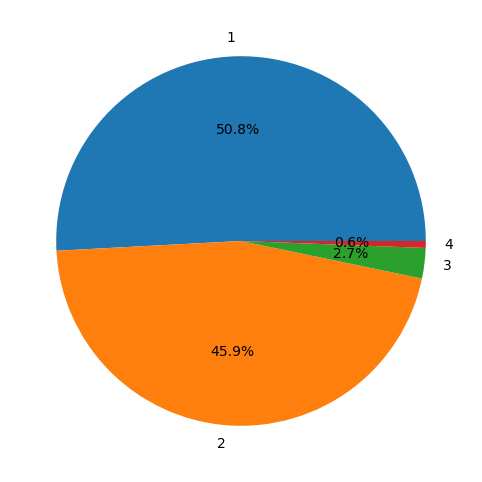

In [97]:
plt.pie(data['NumOfProducts'].value_counts(), labels=data['NumOfProducts'].value_counts().index, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

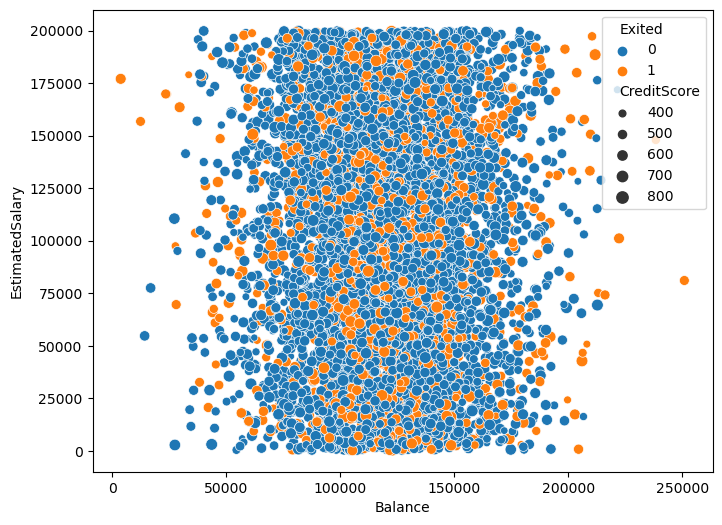

In [122]:
sns.scatterplot(data[data['Balance'] != 0], x = 'Balance', y = 'EstimatedSalary', hue='Exited', size='CreditScore')

In [124]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [126]:
data['Geography'] = data['Geography'].apply(lambda x: 1 if x == 'France' else 2 if x == 'Spain' else 3)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [129]:
data.shape

(10000, 11)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
new_data = ss.fit_transform(data.drop('Exited', axis=1))

In [139]:
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Exited'], test_size=0.2, random_state=2)

In [150]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [149]:
# lightgbm

lgbm = LGBMClassifier()

param_grid = {
    'num_leaves': [20, 30, 40],  # Maximum number of leaves in one tree
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'learning_rate': [0.1, 0.01]  # Learning rate
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_test)


print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1654, number of negative: 6346
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.206750 -> initscore=-1.344628
[LightGBM] [Info] Start training from score -1.344628
Accuracy Score:  0.861
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1617
           1       0.73      0.44      0.55       383

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000



In [148]:
xgb = XGBClassifier()

param_grid = {
    'max_depth': [5, 10, 15],  
    'learning_rate': [0.1, 0.01]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score:  0.856
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1617
           1       0.72      0.41      0.52       383

    accuracy                           0.86      2000
   macro avg       0.80      0.68      0.72      2000
weighted avg       0.84      0.86      0.84      2000



Light GBM is better than XGBoost
# Accuracy: 86.1%